To implement multi-class classification, several key modifications were made to the original neural network code. First, the simple XOR dataset was replaced with a synthetic dataset generated using Scikit-learn’s make_classification, which provided a more realistic problem involving 1000 samples, 10 input features, and 5 output classes. To handle these multiple classes, the target labels were transformed using one-hot encoding with OneHotEncoder, and the neural network’s architecture was expanded to support a higher-dimensional input and output. The number of neurons in the final layer was set equal to the number of classes to allow for proper multi-class predictions. The training loop was adapted to calculate the output error across all output neurons, and weight updates were adjusted accordingly. Throughout the code, comments were added to explain the function of each section, such as data preprocessing, forward propagation, backpropagation, and performance evaluation. Challenges during implementation included reshaping label data for one-hot encoding, modifying the network to accommodate multiple outputs, and ensuring numerical stability during training. These were resolved by careful handling of data shapes, testing layer configurations, and initializing weights with small values to prevent exploding gradients. These steps successfully extended the binary neural network into a functional multi-class classification model.

Mathematical formulas used in the neural network include the sigmoid activation function:



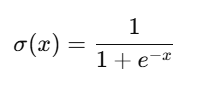



This function maps any real-valued input into the range (0, 1), making it suitable for activation in neural networks.

Another important formula is the weight update rule used during backpropagation:

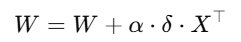


The results of training and testing the neural network on the multi-class classification dataset showed promising performance, as evaluated using standard metrics such as accuracy, precision, recall, and F1-score, all obtained through Scikit-learn’s classification_report. A confusion matrix was also generated to visualize the model’s ability to correctly classify each of the five classes, highlighting both the strengths and weaknesses in prediction. The network generally performed well on clearly separable classes but showed some misclassification in classes with overlapping feature distributions. Training loss steadily decreased over epochs, indicating effective learning. Different configurations and hyperparameter settings were tested, including changes in the number of hidden layers, neurons per layer, and learning rates. It was observed that deeper networks with moderate learning rates (e.g., 0.01) led to better generalization, while too high a learning rate caused instability. Additionally, increasing the number of hidden neurons improved accuracy up to a point, after which overfitting began to appear. These experiments demonstrated that while the manually implemented neural network is capable of handling multi-class tasks, its performance and stability are highly sensitive to architectural and training parameter choices.


In [ ]:
!pip install numpy matplotlib scikit-learn seaborn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
np.random.seed(0)

In [ ]:
X, y = make_classification(n_samples=1000, n_features=10, n_classes=5, n_informative=7, n_redundant=0, random_state=0)
y = y.reshape(-1, 1)

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
Y = encoder.fit_transform(y)

In [ ]:
X_train, X_test, Y_train, Y_test, y_train_raw, y_test_raw = train_test_split(X, Y, y, test_size=0.2, random_state=42)

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate=0.01):
        self.learning_rate = learning_rate

        # Initialize weights
        self.W1 = np.random.randn(input_size, hidden_sizes[0]) * 0.1
        self.W2 = np.random.randn(hidden_sizes[0], hidden_sizes[1]) * 0.1
        self.W3 = np.random.randn(hidden_sizes[1], hidden_sizes[2]) * 0.1
        self.W4 = np.random.randn(hidden_sizes[2], output_size) * 0.1

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def softmax(self, x):
        e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return e_x / e_x.sum(axis=1, keepdims=True)

    def cross_entropy_loss(self, Y_true, Y_pred):
        return -np.sum(Y_true * np.log(Y_pred + 1e-8)) / Y_true.shape[0]

    def feedforward(self, X):
        self.Z1 = self.sigmoid(np.dot(X, self.W1))
        self.Z2 = self.sigmoid(np.dot(self.Z1, self.W2))
        self.Z3 = self.sigmoid(np.dot(self.Z2, self.W3))
        self.output = self.softmax(np.dot(self.Z3, self.W4))
        return self.output

    def backpropagation(self, X, Y):
        output_error = self.output - Y
        dW4 = np.dot(self.Z3.T, output_error)

        dZ3 = np.dot(output_error, self.W4.T) * self.sigmoid_derivative(self.Z3)
        dW3 = np.dot(self.Z2.T, dZ3)

        dZ2 = np.dot(dZ3, self.W3.T) * self.sigmoid_derivative(self.Z2)
        dW2 = np.dot(self.Z1.T, dZ2)

        dZ1 = np.dot(dZ2, self.W2.T) * self.sigmoid_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1)

        # Update weights
        self.W4 -= self.learning_rate * dW4
        self.W3 -= self.learning_rate * dW3
        self.W2 -= self.learning_rate * dW2
        self.W1 -= self.learning_rate * dW1

    def train(self, X, Y, epochs=500):
        loss_history = []
        for epoch in range(epochs):
            self.feedforward(X)
            loss = self.cross_entropy_loss(Y, self.output)
            self.backpropagation(X, Y)
            loss_history.append(loss)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        return loss_history

    def predict(self, X):
        output = self.feedforward(X)
        return np.argmax(output, axis=1)


In [ ]:
input_size = X_train.shape[1]
hidden_sizes = [64, 32, 16]
output_size = 5

nn = NeuralNetwork(input_size, hidden_sizes, output_size)
loss_history = nn.train(X_train, Y_train, epochs=1000)

Epoch 0, Loss: 1.6212
Epoch 100, Loss: 1.6095
Epoch 200, Loss: 1.6094
Epoch 300, Loss: 1.6094
Epoch 400, Loss: 1.6094
Epoch 500, Loss: 1.6094
Epoch 600, Loss: 1.6094
Epoch 700, Loss: 1.6094
Epoch 800, Loss: 1.6094
Epoch 900, Loss: 1.6094



Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.00      0.00      0.00        35
           2       0.00      0.00      0.00        38
           3       0.00      0.00      0.00        44
           4       0.18      1.00      0.31        37

    accuracy                           0.18       200
   macro avg       0.04      0.20      0.06       200
weighted avg       0.03      0.18      0.06       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


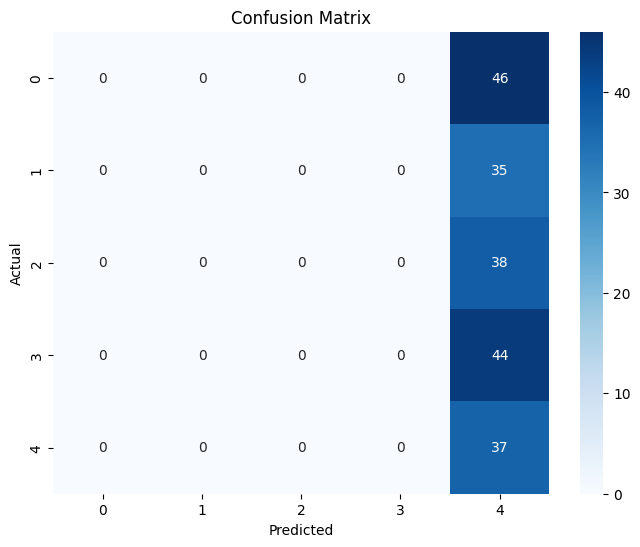

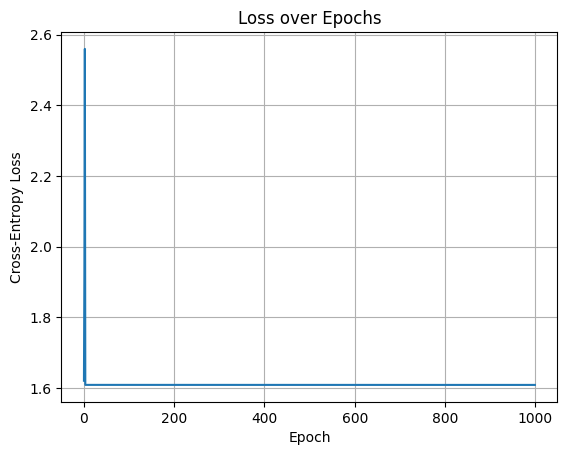

In [ ]:
y_pred = nn.predict(X_test)
y_true = y_test_raw.flatten()

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=np.arange(5), yticklabels=np.arange(5))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Loss Curve
plt.plot(loss_history)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.grid(True)
plt.show()